In [23]:
import suspect
import nibabel
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
img = suspect.image.load_dicom_volume("/home/jovyan/suspect/tests/test_data/siemens/mri/T1.0001.IMA")

In [5]:
nimg = nibabel.nifti1.Nifti1Image(img["volume"].T, img["transform"])

In [6]:
nimg.to_filename("raw.nii.gz")

In [24]:
def plot_slice(fname, z_idx=5):

    # Load the image and collect the data
    # and orientation information
    img = nibabel.load(fname)
    data = img.get_data()
    aff = img.get_affine()

    # Find the center of the brain matrix
    ctr = numpy.dot(numpy.linalg.inv(aff), [0, 0, 0, 1])[:3]

    # Plot the data
    vmin, vmax = (0, 1) if data.dtype == numpy.int16 else (30, 150)
    pyplot.imshow(numpy.rot90(data[:, :, ctr[2] + z_idx]), 
               cmap="gray")
    pyplot.gca().set_axis_off()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


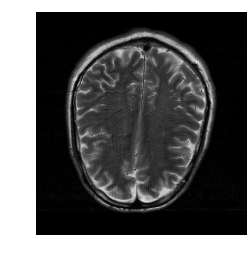

In [25]:
plot_slice("raw.nii.gz")

In [26]:
from nipype.interfaces.fsl import BET

In [27]:
skullstrip = BET()

In [28]:
skullstrip.inputs.in_file = "raw.nii.gz"
skullstrip.inputs.out_file = "brain.nii.gz"

In [29]:
skullstrip.run()

OSError: command 'bet' could not be found on host bec4d36ac218
Interface BET failed to run. 